<a href="https://colab.research.google.com/gist/mhadaniya/e775b5b7cef39141e2f8bc9b17349b2f/18-10-gist-de-codigo-de-aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from io import BytesIO

import requests

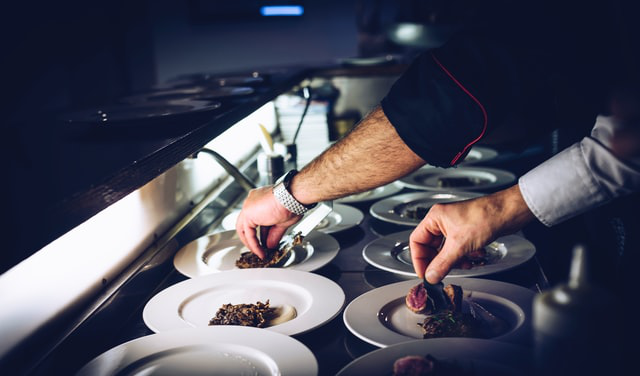

In [37]:
url = 'https://unsplash.com/photos/boaDpmC-_Xo/download?ixid=MnwxMjA3fDB8MXxhbGx8MXx8fHx8fDJ8fDE2MzQ2ODI0MzQ&force=true&w=640'
response = requests.get(url)

image = Image.open(BytesIO(response.content)).convert()
image

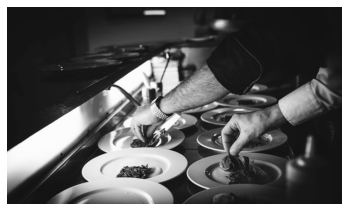

In [38]:
img_arr = np.copy(image)
# img_arr.shape
img_gray_average = np.mean(img_arr, axis=2)

# img_gray_average

plt.imshow(img_gray_average, cmap='gray')
plt.axis('off')
plt.show()



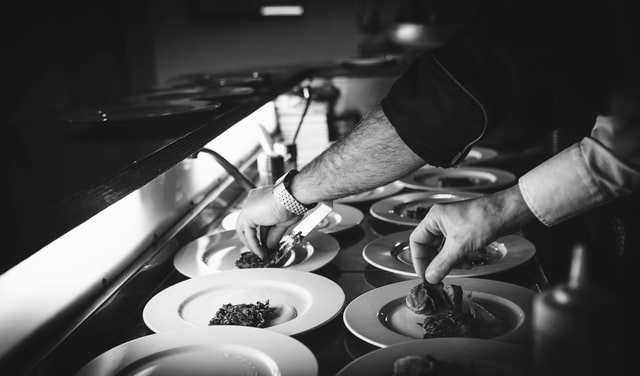

In [39]:
new_img_gray_average = np.empty(shape=img_arr.shape, dtype=np.uint8)
new_img_gray_average[:,:,0] = img_gray_average
new_img_gray_average[:,:,1] = img_gray_average
new_img_gray_average[:,:,2] = img_gray_average

new_img_gray_average

img_res = Image.fromarray(new_img_gray_average)
img_res

In [40]:
img_gray_average.shape

(376, 640)

## Aplicação do _luminance perception_

$ Y_{linear} = 0.2126R_{linear} + 0.7152G_{linear} + 0.0722B_{linear}$

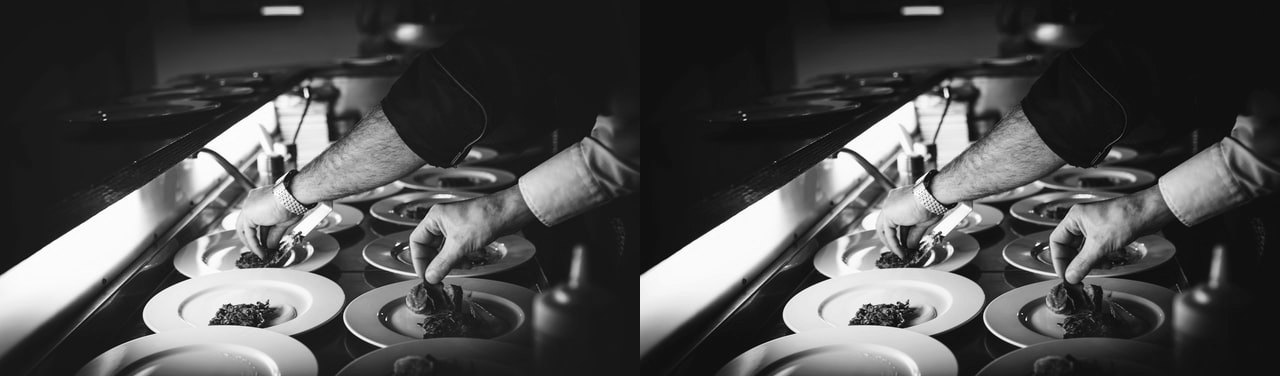

In [41]:
pesos = [0.2126, 0.7152, 0.0722]

res = np.array(img_arr * pesos, dtype=np.uint8)
y = np.array(np.sum(res, axis=2), dtype=np.uint8)

concat = np.array(np.concatenate((img_gray_average,y), axis=1), dtype=np.uint8)

img_ones = Image.fromarray(concat)
img_ones

In [42]:
print(res[0,0,:])
print(img_arr[0,0,:])

[ 2 12  2]
[12 17 39]


In [43]:
res.shape

(376, 640, 3)

In [44]:
np.sum(res, axis=2).shape

(376, 640)

In [45]:
full = 1408 * 2400 * 3
original = 2750 *  4687 * 3

print(f"full: {full}, original: {original} {original/full}")

full: 10137600, original: 38667750 3.8142903645833335


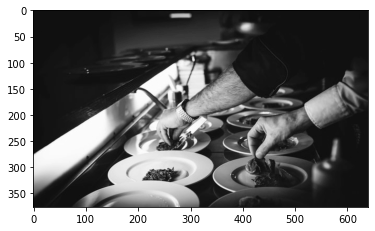

In [48]:
new_array_test = np.sum(res, axis=2)
type(new_array_test)

plt.imshow(new_array_test, cmap='gray')
plt.show()

## Compressão Gamma e aproximação linear


In [15]:
img_gamma = np.copy(image)

In [16]:
img_gamma

array([[[12, 17, 39],
        [12, 17, 39],
        [12, 17, 39],
        ...,
        [12, 17, 39],
        [12, 17, 39],
        [12, 17, 39]],

       [[12, 17, 39],
        [12, 17, 39],
        [12, 17, 39],
        ...,
        [12, 17, 39],
        [12, 17, 39],
        [12, 17, 39]],

       [[12, 17, 39],
        [12, 17, 39],
        [12, 17, 39],
        ...,
        [12, 17, 39],
        [12, 17, 39],
        [12, 17, 39]],

       ...,

       [[13, 18, 40],
        [13, 18, 40],
        [13, 18, 40],
        ...,
        [12, 17, 37],
        [12, 17, 37],
        [12, 17, 37]],

       [[13, 18, 40],
        [13, 18, 40],
        [13, 18, 40],
        ...,
        [12, 17, 37],
        [12, 17, 37],
        [12, 17, 37]],

       [[13, 18, 40],
        [13, 18, 40],
        [13, 18, 40],
        ...,
        [12, 17, 37],
        [12, 17, 37],
        [12, 17, 37]]], dtype=uint8)

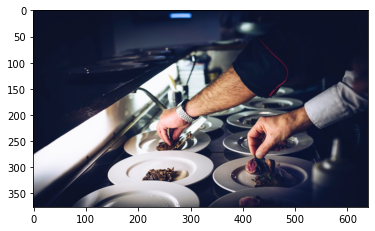

In [17]:
plt.imshow(img_gamma)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


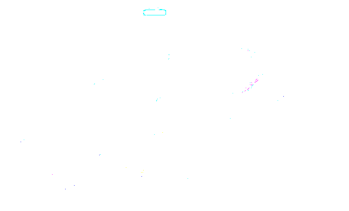

In [64]:
acima_4045 = np.where(img_gamma > .04045)
img_gamma_final[acima_4045] = ((img_gamma[acima_4045] + 0.055) / 1.055) ** 2.4
abaixo_4045 = np.where(img_gamma <= .04045)
img_gamma_final[i_low] = img_gamma[abaixo_4045] / 12.92
#img_gamma_final = img_gamma_final/4 
plt.imshow(img_gamma_final)
plt.axis('off')
plt.show()

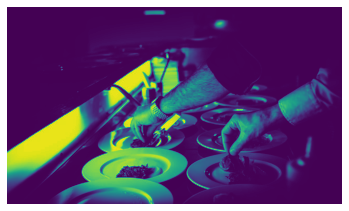

In [67]:
vermelho = img_gamma_final[:,:,0]
verde = img_gamma_final[:,:,1]
azul = img_gamma_final[:,:,2]

aproximacao  = ((vermelho *0.299) + (verde * 0.587) + (azul * 0.114 ))
plt.imshow(aproximacao)
plt.axis('off')
plt.show()
